In [3]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

import sys
sys.path.insert(0, '/Users/anup.sethuram/DEV/LM/EanS/ml30/ml30/ml-ng/C2/W1/utils')


In [6]:
from lab_utils_common import dlc
from lab_neurons_utils import plt_prob_1d, sigmoidnp, plt_linear, plt_logistic
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

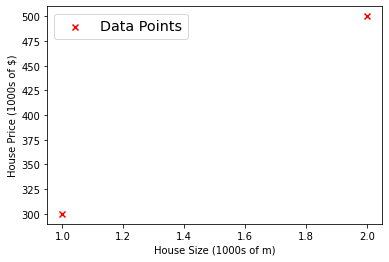

In [24]:




X_train = np.array([[1.0], [2.0]], dtype=np.float32)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend(fontsize='x-large')
ax.set_xlabel("House Size (1000s of m)")
ax.set_ylabel("House Price (1000s of $)")

plt.show()


The function implemented by a neuron with no activation is the same as in Course 1, linear regression:
$$ f_{\mathbf{w},b}(x^{(i)}) = \mathbf{w}\cdot x^{(i)} + b \tag{1}$$


In [25]:


linear_layer = tf.keras.layers.Dense(units=1, activation = 'linear')


In [26]:
linear_layer.get_weights()

[]

In [27]:
inp = X_train[0].reshape(1,1)
inp

array([[1.]], dtype=float32)

In [28]:
al = linear_layer(inp)
al

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.44]], dtype=float32)>

In [29]:
w, b= linear_layer.get_weights()
print(f"w = {w}, b = {b}")

w = [[0.44]], b = [0.]


In [30]:
# Note: Weights are initialized to random values.


In [31]:
# Lets set weights and bias to a known value


set_w = np.array([[200]])
set_b = np.array([100])

linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [32]:
# Compare linear_layer with linear equation.

al = linear_layer(inp)
alin = np.dot(set_w, inp) + set_b

print(al)
print(alin)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[[300.]]


In [33]:
prediction_tf = linear_layer(X_train)
prediction_le = np.dot(X_train, set_w) + set_b


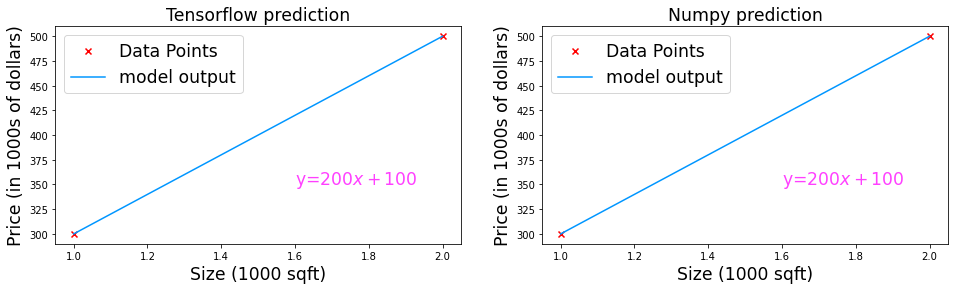

In [34]:


plt_linear(X_train, Y_train, prediction_tf, prediction_le)

In [38]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1) # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

In [39]:
pos = Y_train == 1
neg = Y_train == 0

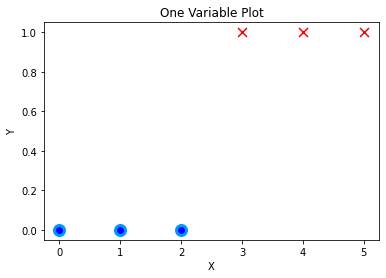

In [48]:


fig, ax = plt.subplots(1,1)
ax.scatter(X_train[neg], Y_train[neg], marker='o', c='b', label="y=0", s=100, facecolors='none', lw=3, edgecolors=dlc["dlblue"])
ax.scatter(X_train[pos], Y_train[pos], marker='x', c='r', label="y=1", s=80)
ax.set_title("One Variable Plot")
ax.set_xlabel("X")
ax.set_ylabel("Y")
plt.show()

In [49]:
# Logistic Neuron

In [50]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1, activation='sigmoid', name='L1')
    ]
)

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [52]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape, b.shape)

[[0.25]] [0.]
(1, 1) (1,)


In [53]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [54]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = sigmoidnp(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)

1/1 [==============================] - 0s 79ms/step
[[0.01]]
[[0.01]]


1/1 [==============================] - 0s 17ms/step


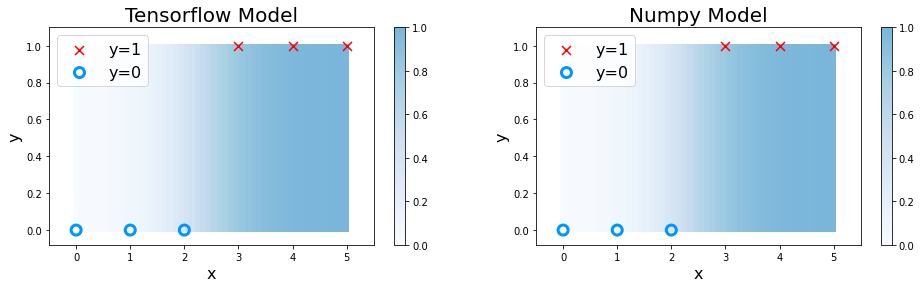

In [55]:
plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg)